# Getting Started

`pyopenms_viz` allows users to visualize mass spectrometry data with minimal effort, making it ideal for software developers, bioinformaticians, and experimental scientists.

This tutorial demonstrates the basic usage of `pyopenms_viz`, a plotting interface built on top of pandas for generating mass spectrometry plots like spectra, chromatograms, and peak maps.

## Tutorial Requirements:
- `pyopenms` (v3.2.0) For data loading

## Overview

<div style="text-align: center;">
    <img src="img/figure1.png" alt="PyOpenMS-Viz Figure 1" style="width: 600px; height: auto; "/>
</div>


`pyopenms-viz` is a plotting framework supporting multiple plot types. Pyopenms_viz assumes that the data is already formatted in a pandas dataframe. This is already supported by a variety of mass spectrometry based python packages shown here.  

### The `plot()` Method

The only function required for users of `pyopenms_viz` is the `plot()` method. This method is called directly on a pandas dataframe storing mass spectrometry data in the long format. This means that each row represents a single peak as shown in the example table above.

#### Required Arguments

1. **x** - The column name of the x-axis
2. **y** - The column name of the y-axis
4. **z** (only peakmaps) - The column name of the z-axis - represented as colour in the peakmaps
3. **kind** - The kind of plot, can be "PeakMap", "Mobilogram", "Spectrum" or "Chromatogram"
5. **Backend** - The backend to plot can be one of "ms_matplotlib", "ms_plotly" or "ms_bokeh"
    - ms_matplotlib - Standard python plotting backend, good for generating publication quality static plots 
    - ms_bokeh - Lightweight interactive plotting
    - ms_plotly - Feature rich interactive plotting, also supports 3D plots, good integration with streamlit

#### Optional Arguments

Plots are highly customizable with additional arguments passed to the `plot()` method. For a full list of supported. A few notable optional arguments are mentioned below.

1. **by** - Grouping of the data, functionality depends on the plot type.
   - Spectrum = colors peaks based on grouping
   - Chromatogram/Mobilogram = Draw a separate line trace for each grouping
   - PeakMap = Different markers (e.g. "+", "." ..) for peaks of different groups
1. **show_plot** (default = True) - If `True`, the method returns `None` and the plot output. If `False` the plot is not shown and the function returns the underlying figure/axes object (depending on backend)

## Plot a Spectrum

The Spectrum is one of the most commonly used plots in mass spectrometry. It contains mass-to-charge on the x-axis and intensity on the y-axis.  

### Loading Spectrum Data

### Download The Data

The `.mzML` file we are using is an example from the pyopenms tutorial.

In [1]:
from urllib.request import urlretrieve

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(
       gh + "/src/data/PrecursorPurity_input.mzML", "test.mzML"
   )
urlretrieve(
       gh + "/src/data/YIC(Carbamidomethyl)DNQDTISSK.mzML", "YIC(Carbamidomethyl)DNQDTISSK.mzML"
   )

('YIC(Carbamidomethyl)DNQDTISSK.mzML',
 <http.client.HTTPMessage at 0x75703e5c3800>)

`pyopenms_viz` expects the data in long format, meaning that row represents a single peak. This can be achieved in `pyopenms` by using the built in `get_df` method on an `MSExperiment` object.

In [2]:
import pyopenms as oms

# Load the raw mass spectrometry data
exp = oms.MSExperiment()
oms.MzMLFile().load("test.mzML", exp)

# Get the first spectrum 
spectrum = oms.MSSpectrum(exp.getSpectrum(0))

# convert spectrum to df
spectrum_df = spectrum.get_df()


### Downloading the Data

In this example, we will use `pyopenms` to load the .mzML file into a pandas dataframe. Examples using different packages can be found here.

In [3]:
from urllib.request import urlretrieve

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(
       gh + "/src/data/PrecursorPurity_input.mzML", "test.mzML"
   )
urlretrieve(
       gh + "/src/data/YIC(Carbamidomethyl)DNQDTISSK.mzML", "YIC(Carbamidomethyl)DNQDTISSK.mzML"
   )

('YIC(Carbamidomethyl)DNQDTISSK.mzML',
 <http.client.HTTPMessage at 0x75703e5c3920>)

### Reading the data into a pandas DataFrame with `pyopenms`

In [4]:
import pyopenms as oms

# Load the raw mass spectrometry data
exp = oms.MSExperiment()
oms.MzMLFile().load("YIC(Carbamidomethyl)DNQDTISSK.mzML", exp)

# Fetch the first spectrum
spectrum = oms.MSSpectrum(exp.getSpectrum(0))

# Export the spectrum to a pandas dataframe
spectrum_df = spectrum.get_df()
spectrum_df.head(5)

mz  intensity  ion_mobility ion_mobility_unit  ms_level  \
0  212.012451   6.041170           NaN            <NONE>         2   
1  217.039612   2.125546           NaN            <NONE>         2   
2  230.094986   6.776063           NaN            <NONE>         2   
3  231.250870   3.464486           NaN            <NONE>         2   
4  232.206757   2.642101           NaN            <NONE>         2   

   precursor_mz  precursor_charge      native_id sequence ion_annotation  \
0    722.324707                 2  spectrum=2624                           
1    722.324707                 2  spectrum=2624                           
2    722.324707                 2  spectrum=2624                           
3    722.324707                 2  spectrum=2624                           
4    722.324707                 2  spectrum=2624                           

   base peak m/z  base peak intensity  total ion current  lowest observed m/z  \
0            584                  906               7561                  212   
1            584                  906               7561                  212   
2            584                  906               7561                  212   
3            584                  906               7561                  212   
4            584                  906               7561                  212   

   highest observed m/z                                      filter string  \
0                  1297  ITMS + c NSI d w Full ms2 722.32@cid35.00 [185...   
1                  1297  ITMS + c NSI d w Full ms2 722.32@cid35.00 [185...   
2                  1297  ITMS + c NSI d w Full ms2 722.32@cid35.00 [185...   
3                  1297  ITMS + c NSI d w Full ms2 722.32@cid35.00 [185...   
4                  1297  ITMS + c NSI d w Full ms2 722.32@cid35.00 [185...   

   preset scan configuration  
0                          2  
1                          2  
2                          2  
3                          2  
4                          2

### Plot Using `pyopenms_viz`

Now that we have the spectrum in a Pandas Dataframe, we can plot it using `pyopenms_viz`. Note that we must specify that the x-axis is the column labelled `mz` and the y-axis is the column labelled `intensity`. Furthermore, a backend must also be specified.

In [5]:
spectrum_df.plot(kind='spectrum', backend='ms_bokeh', x='mz', y='intensity')

Loading BokehJS ...

figure(id='p1001', ...)

As this plot is interactive we can zoom in using the bokeh toolbar and also hovering over the peaks will provide their annotations.

We can instead plot using matploltib by adjusting the `backend`.

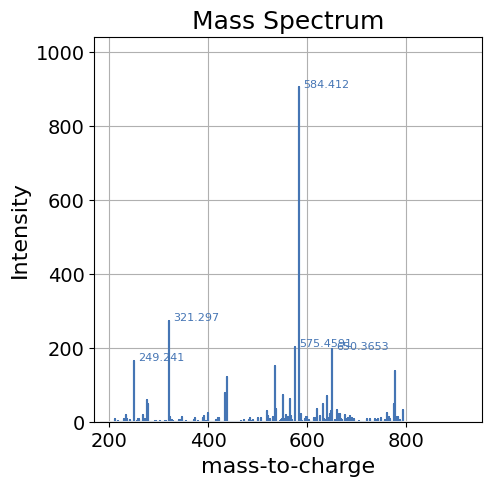

In [6]:
spectrum_df.plot(kind='spectrum', backend='ms_matplotlib', x='mz', y='intensity')

#### Further Customization

By default we see that the top 5 most intense peaks are annotated. This can be turned off by setting `annotate_top_n_peaks` to 0. Furthermore, we can also plot the relative intensity instead by setting `relative_intensity=True`

In [7]:
spectrum_df.plot(kind='spectrum', backend='ms_bokeh', x='mz', y='intensity', annotate_top_n_peaks=0, relative_intensity=True)

Loading BokehJS ...

figure(id='p1062', ...)

## Plotting A Mirror Spectrum

One common strategy to compare spectra is to plot one spectrum on the negative y-axis. This functionality is built into `pyopenmz_viz` though the `reference_spectrum` parameter.

### Create a mirror reference spectrum using `pyopenms`

Using `pyopenms` we can create a theoretical spectrum on the peptide `YIC(Carbamidomethyl)DNQDTISSK` to compare with the experimental spectrum shown above.

In [8]:
# Generate theoretical spectrum
tsg = oms.TheoreticalSpectrumGenerator()
theo_spec = oms.MSSpectrum()
peptide = oms.AASequence.fromString("YIC(Carbamidomethyl)DNQDTISSK")
tsg.getSpectrum(theo_spec, peptide, 1, 1)
theo_spec_df = theo_spec.get_df()

### Plot the Spectrum

To plot with pyopenms_viz, all that is required is the addtional `reference_spectrum` parameter which contains a pandas dataframe of the theoretical spectrum and to change `mirror_spectrum` to `True`

In [9]:
spectrum_df.plot(kind='spectrum', backend='ms_bokeh', x='mz', y='intensity', annotate_top_n_peaks=0, relative_intensity=True, reference_spectrum=theo_spec_df, mirror_spectrum=True)

Loading BokehJS ...

figure(id='p1118', ...)

## Plot a PeakMap

A peakmap is a useful plot for generating an overview of the entire profile (MS1) data. In this representation all analytes can be visualized across time. 

### Download Data and Load Data

Here, we are using a slice of 100 seconds of a metabolomics dataset which only contains MS1 information. In peakmap plots, it does not make sense to plot both MS1 and MS2 data in a single plot.

In [10]:
gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(gh + "/src/data/FeatureFinderMetaboIdent_1_input.mzML", "test.mzML")

# open .mzML file using pyopenms
exp = oms.MSExperiment()
oms.MzMLFile().load("test.mzML", exp)

# convert pyopenms object to pandas dataframe
exp_df = exp.get_df(long=True)
exp_df

RT          mz          inty
0       200.232544  250.117401   1314.365601
1       200.232544  250.117935   2756.825439
2       200.232544  250.118469   4262.159180
3       200.232544  250.118988   4490.361816
4       200.232544  250.119522   3139.247803
...            ...         ...           ...
117987  299.812897  274.114136   7654.166992
117988  299.812897  274.114746  10584.880859
117989  299.812897  274.115356   9032.423828
117990  299.812897  274.115967   5456.675293
117991  299.812897  274.116577   2176.139404

[117992 rows x 3 columns]

In [11]:
exp_df.plot(kind='peakmap', backend='ms_bokeh', x='RT', y='mz', z='inty')

Loading BokehJS ...

figure(id='p1225', ...)

### Turning off Binning

By default, binning is applied on peakmaps to speed up the plotting, binning can be turned off using bin_peaks = `False`

In [12]:
exp_df.plot(kind='peakmap', backend='ms_bokeh', x='RT', y='mz', z='inty', bin_peaks=False)

Loading BokehJS ...

figure(id='p1325', ...)

## Chromatogram Plot

A chromatogram plot is useful for visualizing intensity across retention time. This can either be the total ion current across retention time or the ion curent from a specific region across m/z as used in targeted apporaches. 

In this example, we will visualize the total ion current of the metabolomics dataset above. By default, pyopenms_viz does not manipulate the supplied 

In [13]:
exp_df.plot(kind='chromatogram', backend='ms_bokeh', x='RT', y='inty')

in plot
done plot


/home/joshua/Development/pyopenms_viz/pyopenms_viz/_core.py:250: UserWarning: Duplicate data detected, data will not be aggregated which may lead to unexpected plots. To enable aggregation set `aggregate_duplicates=True`.
  warnings.warn(


Loading BokehJS ...

figure(id='p1390', ...)

By default pyopenms_viz does not manipulate the supplied dataframe meaning that there might be multiple points plotted at a single retention time value leading to unexpected plots. Peaks can be automatically summed up using `aggregate_duplicates=True`

In [14]:
exp_df.plot(kind='chromatogram', backend='ms_bokeh', x='RT', y='inty', aggregate_duplicates=True)

in plot
done plot


Loading BokehJS ...

figure(id='p1453', ...)

In this dataset different features are resolved nicely as indicated by nicely seperable peaks. 